In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates
import seaborn
seaborn.set(style='whitegrid')


In [284]:
df = pd.read_csv("Amber_B4.csv", encoding="ISO-8859–1")


In [285]:
df["DateTime"] = pd.to_datetime(df["DateTime"])


In [286]:
df

,DateTime,Furnace Pressure Process value,Distributor Temp Process value,Melter oil Flow Process value,Glass Level Process value,B4 A HP Process value,B4 A HP Set Value,B4 A LP Process value,B4 A LP Set Value,B4 B LP Process value,...,Number,NumberOfSection,NumberOfGob,GobCutPerMinute,ISMachineActualSpeed,GobWeightLow,GobWeightHigh,GlassDraw,PackedQunatity,ProductionOrderNumber
0,2021-05-26 02:00:00,1.101833,1382.807500,0.152500,-0.016833,37.009667,37,29.899500,30,30.015167,...,J20844,6,3,168,504.0,0,0,70.51,2920500,1023724
1,2021-05-26 03:00:00,1.049167,1382.065667,0.112667,-0.054333,36.989333,37,29.960500,30,30.011000,...,J20844,6,3,168,504.0,0,0,70.51,2920500,1023724
2,2021-05-26 04:00:00,0.970500,1381.013000,0.106333,-0.067167,36.993000,37,30.001833,30,30.018833,...,J20844,6,3,168,504.0,0,0,70.51,2920500,1023724
3,2021-05-26 05:00:00,0.895500,1382.282333,0.123667,-0.156333,36.980167,37,29.973000,30,30.002833,...,J20844,6,3,168,504.0,0,0,70.51,2920500,1023724
4,2021-05-26 06:00:00,0.875667,1381.688500,0.107333,-0.075500,37.008333,37,30.027000,30,30.011833,...,J20844,6,3,168,504.0,0,0,70.51,2920500,1023724
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1245,2021-08-31 20:00:00,0.875667,1378.497500,0.149000,0.022167,39.177000,39,30.046167,30,30.015333,...,J22573,6,3,168,504.0,0,0,69.38,2756040,1025499
1246,2021-08-31 21:00:00,0.875833,1379.409000,0.149167,0.023667,39.222500,39,30.007333,30,29.986167,...,J22573,6,3,168,504.0,0,0,69.38,2756040,1025499
1247,2021-08-31 22:00:00,0.881667,1379.893000,0.156500,0.006500,39.329833,39,29.973667,30,30.000833,...,J22573,6,3,168,504.0,0,0,69.38,2756040,1025499
1248,2021-08-31 23:00:00,0.885667,1379.862833,0.153667,-0.019000,39.349167,39,29.991167,30,30.005667,...,J22573,6,3,168,504.0,0,0,69.38,2756040,1025499


In [287]:
df.describe()["DPR Eff"]

count    1250.000000
mean       79.347312
std        14.280602
min         0.000000
25%        80.000000
50%        80.950000
75%        82.930000
max       306.670000
Name: DPR Eff, dtype: float64

In [288]:
df["Type"] = ""*len(df)

In [289]:
c1 = df.index[(df["DPR Eff"] <= 80)]
c2 = df.index[(df["DPR Eff"] >= 80) &
              (df["DPR Eff"] <= 81)]
c3 = df.index[(df["DPR Eff"] >= 81) & (df["DPR Eff"] <= 83)]
c4 = df.index[(df["DPR Eff"] >= 83) &
              (df["DPR Eff"] <= 100)]

c1, c2, c3, c4


(Int64Index([  10,   11,   12,   13,   14,   15,   16,   17,   18,   19,
             ...
             1196, 1197, 1198, 1199, 1200, 1201, 1202, 1208, 1209, 1215],
            dtype='int64', length=363),
 Int64Index([ 306,  307,  314,  336,  337,  338,  345,  351,  352,  353,
             ...
             1228, 1229, 1230, 1231, 1232, 1233, 1234, 1235, 1236, 1237],
            dtype='int64', length=488),
 Int64Index([  38,   39,   40,   41,   42,   43,   46,   50,   61,   62,
             ...
              585,  586,  587,  588, 1238, 1242, 1243, 1244, 1248, 1249],
            dtype='int64', length=190),
 Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
             ...
             1190, 1191, 1192, 1193, 1239, 1240, 1241, 1245, 1246, 1247],
            dtype='int64', length=273))

In [290]:
df.loc[c1, "Type"] = "[0, 80]"
df.loc[c2, "Type"] = "[80, 81]"
df.loc[c3, "Type"] = "[81, 83]"
df.loc[c4, "Type"] = "[83, 100]"

In [291]:
df1 = df.rename(columns = {"Type":"DPR_Eff_Metric"})

In [292]:
df1

,DateTime,Furnace Pressure Process value,Distributor Temp Process value,Melter oil Flow Process value,Glass Level Process value,B4 A HP Process value,B4 A HP Set Value,B4 A LP Process value,B4 A LP Set Value,B4 B LP Process value,...,NumberOfSection,NumberOfGob,GobCutPerMinute,ISMachineActualSpeed,GobWeightLow,GobWeightHigh,GlassDraw,PackedQunatity,ProductionOrderNumber,DPR_Eff_Metric
0,2021-05-26 02:00:00,1.101833,1382.807500,0.152500,-0.016833,37.009667,37,29.899500,30,30.015167,...,6,3,168,504.0,0,0,70.51,2920500,1023724,"[83, 100]"
1,2021-05-26 03:00:00,1.049167,1382.065667,0.112667,-0.054333,36.989333,37,29.960500,30,30.011000,...,6,3,168,504.0,0,0,70.51,2920500,1023724,"[83, 100]"
2,2021-05-26 04:00:00,0.970500,1381.013000,0.106333,-0.067167,36.993000,37,30.001833,30,30.018833,...,6,3,168,504.0,0,0,70.51,2920500,1023724,"[83, 100]"
3,2021-05-26 05:00:00,0.895500,1382.282333,0.123667,-0.156333,36.980167,37,29.973000,30,30.002833,...,6,3,168,504.0,0,0,70.51,2920500,1023724,"[83, 100]"
4,2021-05-26 06:00:00,0.875667,1381.688500,0.107333,-0.075500,37.008333,37,30.027000,30,30.011833,...,6,3,168,504.0,0,0,70.51,2920500,1023724,"[83, 100]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1245,2021-08-31 20:00:00,0.875667,1378.497500,0.149000,0.022167,39.177000,39,30.046167,30,30.015333,...,6,3,168,504.0,0,0,69.38,2756040,1025499,"[83, 100]"
1246,2021-08-31 21:00:00,0.875833,1379.409000,0.149167,0.023667,39.222500,39,30.007333,30,29.986167,...,6,3,168,504.0,0,0,69.38,2756040,1025499,"[83, 100]"
1247,2021-08-31 22:00:00,0.881667,1379.893000,0.156500,0.006500,39.329833,39,29.973667,30,30.000833,...,6,3,168,504.0,0,0,69.38,2756040,1025499,"[83, 100]"
1248,2021-08-31 23:00:00,0.885667,1379.862833,0.153667,-0.019000,39.349167,39,29.991167,30,30.005667,...,6,3,168,504.0,0,0,69.38,2756040,1025499,"[81, 83]"


In [293]:
df_names = pd.read_csv("Box_plots.csv")

In [294]:
df_names

,Name,Name2,Unnamed: 2
0,B4 A front bottom temp Process value,NaN,NaN
1,B4 A Front Top temp Process value,NaN,NaN
2,B4 A Front Top temp Set Value,NaN,NaN
3,B4 B front bottom temp Process value,NaN,NaN
4,B4 B Front Top temp Process value,NaN,NaN
5,B4 B Front Top temp Set Value,NaN,NaN
6,B4 Middle bottom temp Process value,NaN,NaN
7,B4 Rear Bottom temp Process value,NaN,NaN
8,B4 Rear Top temp Process value,NaN,NaN
9,NaN,Density (g/cm3),NaN


In [295]:
li = df_names["Name"].unique()
li  = li[:-1]
li

array(['B4 A front bottom temp Process value',
       'B4 A Front Top temp Process value',
       'B4 A Front Top temp Set Value',
       'B4 B front bottom temp Process value',
       'B4 B Front Top temp Process value',
       'B4 B Front Top temp Set Value',
       'B4 Middle bottom temp Process value',
       'B4 Rear Bottom temp Process value',
       'B4 Rear Top temp Process value'], dtype=object)

In [296]:
li = [x.strip() for x in li]
li

['B4 A front bottom temp Process value',
 'B4 A Front Top temp Process value',
 'B4 A Front Top temp Set Value',
 'B4 B front bottom temp Process value',
 'B4 B Front Top temp Process value',
 'B4 B Front Top temp Set Value',
 'B4 Middle bottom temp Process value',
 'B4 Rear Bottom temp Process value',
 'B4 Rear Top temp Process value']

In [297]:
li.append("DPR_Eff_Metric")

In [298]:
li.append("DateTime")

In [299]:
df1 = df1[li]

In [300]:
df1

,B4 A front bottom temp Process value,B4 A Front Top temp Process value,B4 A Front Top temp Set Value,B4 B front bottom temp Process value,B4 B Front Top temp Process value,B4 B Front Top temp Set Value,B4 Middle bottom temp Process value,B4 Rear Bottom temp Process value,B4 Rear Top temp Process value,DPR_Eff_Metric,DateTime
0,1304.518000,1475.028500,1475.0,1277.333667,1484.991667,1485.0,1323.198500,1371.183333,1469.980833,"[83, 100]",2021-05-26 02:00:00
1,1304.894333,1474.991333,1475.0,1278.130167,1484.961500,1485.0,1323.285667,1371.663667,1470.064000,"[83, 100]",2021-05-26 03:00:00
2,1305.224000,1475.078667,1475.0,1278.088667,1484.869500,1485.0,1323.394000,1372.052500,1470.043333,"[83, 100]",2021-05-26 04:00:00
3,1305.917500,1474.997000,1475.0,1277.315833,1484.963333,1485.0,1323.735833,1372.273000,1470.092167,"[83, 100]",2021-05-26 05:00:00
4,1305.615167,1474.971000,1475.0,1277.538667,1484.963167,1485.0,1323.919500,1372.342500,1469.958333,"[83, 100]",2021-05-26 06:00:00
...,...,...,...,...,...,...,...,...,...,...,...
1245,1357.305833,1425.024000,1425.0,1379.737333,1405.000167,1405.0,1366.404833,1354.667500,1464.797833,"[83, 100]",2021-08-31 20:00:00
1246,1356.969500,1425.011167,1425.0,1379.722167,1404.975000,1405.0,1366.152333,1354.290667,1464.587000,"[83, 100]",2021-08-31 21:00:00
1247,1356.849167,1425.007833,1425.0,1379.587333,1405.016667,1405.0,1365.492167,1354.826833,1465.599167,"[83, 100]",2021-08-31 22:00:00
1248,1356.592000,1424.989167,1425.0,1379.112000,1404.995000,1405.0,1365.282000,1354.132167,1464.345500,"[81, 83]",2021-08-31 23:00:00


In [271]:
# df2 = df1[df1["Date"]=="14-12-2021"]
# df2


In [301]:
li = li[:-2]

In [302]:
li

['B4 A front bottom temp Process value',
 'B4 A Front Top temp Process value',
 'B4 A Front Top temp Set Value',
 'B4 B front bottom temp Process value',
 'B4 B Front Top temp Process value',
 'B4 B Front Top temp Set Value',
 'B4 Middle bottom temp Process value',
 'B4 Rear Bottom temp Process value',
 'B4 Rear Top temp Process value']

In [303]:
for column in df1.columns:
    if(column[-9:] == "Set Value"):
        df1 = df1.rename(columns={column: " ".join(column.split(" ")[:-2])})
    elif(column[-13:] == "Process value"):
        df1 = df1.rename(columns={column: " ".join(column.split(" ")[:-2])})
df1


,B4 A front bottom temp,B4 A Front Top temp,B4 A Front Top temp,B4 B front bottom temp,B4 B Front Top temp,B4 B Front Top temp,B4 Middle bottom temp,B4 Rear Bottom temp,B4 Rear Top temp,DPR_Eff_Metric,DateTime
0,1304.518000,1475.028500,1475.0,1277.333667,1484.991667,1485.0,1323.198500,1371.183333,1469.980833,"[83, 100]",2021-05-26 02:00:00
1,1304.894333,1474.991333,1475.0,1278.130167,1484.961500,1485.0,1323.285667,1371.663667,1470.064000,"[83, 100]",2021-05-26 03:00:00
2,1305.224000,1475.078667,1475.0,1278.088667,1484.869500,1485.0,1323.394000,1372.052500,1470.043333,"[83, 100]",2021-05-26 04:00:00
3,1305.917500,1474.997000,1475.0,1277.315833,1484.963333,1485.0,1323.735833,1372.273000,1470.092167,"[83, 100]",2021-05-26 05:00:00
4,1305.615167,1474.971000,1475.0,1277.538667,1484.963167,1485.0,1323.919500,1372.342500,1469.958333,"[83, 100]",2021-05-26 06:00:00
...,...,...,...,...,...,...,...,...,...,...,...
1245,1357.305833,1425.024000,1425.0,1379.737333,1405.000167,1405.0,1366.404833,1354.667500,1464.797833,"[83, 100]",2021-08-31 20:00:00
1246,1356.969500,1425.011167,1425.0,1379.722167,1404.975000,1405.0,1366.152333,1354.290667,1464.587000,"[83, 100]",2021-08-31 21:00:00
1247,1356.849167,1425.007833,1425.0,1379.587333,1405.016667,1405.0,1365.492167,1354.826833,1465.599167,"[83, 100]",2021-08-31 22:00:00
1248,1356.592000,1424.989167,1425.0,1379.112000,1404.995000,1405.0,1365.282000,1354.132167,1464.345500,"[81, 83]",2021-08-31 23:00:00


In [304]:
li = df1.columns.tolist()
li = li[:-2]

In [305]:
li

['B4 A front bottom temp',
 'B4 A Front Top temp',
 'B4 A Front Top temp',
 'B4 B front bottom temp',
 'B4 B Front Top temp',
 'B4 B Front Top temp',
 'B4 Middle bottom temp',
 'B4 Rear Bottom temp',
 'B4 Rear Top temp']

## Box Plots

In [216]:
df2 = df1[df1["K2O"]<=2.5]
df2 = df2[df2["Fe2O3"]<=0.2]

In [240]:
df2 = df1[df1["Al2O3"]<=5]
df2= df2[df2["CaO"]>2]
df2 = df2[df2["density gm cc"]>2.42]
df2 = df2[df2["K2O"]<1.75]
df2 = df2[df2["MgO"]>0.5]
df2 = df2[df2["Na2O"]>9]
df2 = df2[df2["Fe2O3"]<0.2]


In [306]:
for elem in li:
    if(elem=="Name" or elem=="Date" or elem=="FGCode"):
        continue
    seaborn.boxplot(x="DPR_Eff_Metric",
                y=elem,
                data=df1, order=["[0, 80]", "[80, 81]", "[81, 83]", "[83, 100]"])
    plt.savefig("amber/Box Plots/DPR Efficiency/{}.png".format(elem))
    plt.clf()


ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

<Figure size 432x288 with 0 Axes>

## Histogram

In [140]:
for elem in li:
    plt.hist(list(df2[elem]), bins=20)
    plt.xlabel(elem)
    plt.savefig("amber/Histogram/{}.png".format(elem))
    plt.clf()


<Figure size 432x288 with 0 Axes>

## Line Chart


In [141]:
df2 = df2.drop("DPR_Eff_Metric", axis =1)

In [142]:
df2["DateTime"]  = pd.to_datetime(df2["DateTime"]).dt.date

In [143]:
df2 = df2.groupby("DateTime").mean().reset_index()
df2

,DateTime,Al2O3,Fe2O3,CaO,MgO,Na2O,K2O,SO3,density gm cc,seed count result
0,2021-01-06,2.208065,0.062903,8.664839,2.178710,13.006774,0.466774,0.119871,2.499390,21.258065
1,2021-01-07,2.415152,0.060818,8.137273,1.972727,12.687576,0.584848,0.126788,2.488109,21.060606
2,2021-01-08,2.215000,0.061031,8.695625,2.180000,13.026250,0.461250,0.123000,2.487069,21.437500
3,2021-01-09,2.441250,0.061125,8.116250,1.953750,12.662500,0.577500,0.128125,2.488147,22.187500
4,2021-02-06,2.381667,0.073500,8.483333,2.120000,12.756667,0.601667,0.103167,2.485000,21.500000
5,2021-02-08,2.356667,0.072333,8.456667,2.133333,12.763333,0.598333,0.102667,2.513217,19.166667
6,2021-03-06,2.341667,0.071500,8.471667,2.143333,12.756667,0.581667,0.104500,2.484917,23.000000
7,2021-03-08,2.340000,0.071167,8.456667,2.151667,12.766667,0.581667,0.105167,2.484083,22.500000
8,2021-04-06,2.282857,0.062286,8.355714,2.040000,12.957143,0.448571,0.140571,2.490229,22.571429
9,2021-04-08,1.790000,0.065867,9.561667,2.316667,13.693333,0.230000,0.151167,2.503400,20.166667


In [144]:
# df1["Date"] = pd.to_datetime(df1["Date"], format='%d-%m-%Y')
# df1.sort_values(by='Date')


In [145]:
# df2 = df1[df1["P3 ZONE 1 TOP TEMPERATURE"] > 600]

# df2


In [146]:
li = list(df2.columns)
li

['DateTime',
 'Al2O3',
 'Fe2O3',
 'CaO',
 'MgO',
 'Na2O',
 'K2O',
 'SO3',
 'density gm cc',
 'seed count result']

In [147]:
li = li[1:]

In [148]:
df2["DateTime"] = pd.to_datetime(df2["DateTime"])

In [149]:
df2 = df2[(df2['DateTime'] > "2021-05-26") & (df2['DateTime'] <= "2021-09-01")]
df2

,DateTime,Al2O3,Fe2O3,CaO,MgO,Na2O,K2O,SO3,density gm cc,seed count result
13,2021-05-29,1.683333,0.109000,10.133333,2.656667,13.873333,0.166667,0.101667,2.510167,25.333333
14,2021-05-30,1.693333,0.107667,10.086667,2.666667,13.873333,0.170000,0.102667,2.509767,25.666667
15,2021-05-31,1.693333,0.107667,10.150000,2.633333,13.883333,0.170000,0.101000,2.510200,25.333333
16,2021-06-14,1.686667,0.113000,10.153333,2.740000,13.896667,0.156667,0.094000,2.511433,26.333333
17,2021-06-15,1.673333,0.114000,10.156667,2.740000,13.883333,0.156667,0.096333,2.511500,25.666667
18,2021-06-16,1.710000,0.111667,10.143333,2.736667,13.903333,0.156667,0.096333,2.511833,26.000000
19,2021-06-17,1.690000,0.111000,10.140000,2.736667,13.933333,0.153333,0.097333,2.511667,26.333333
20,2021-06-18,1.686667,0.111667,10.103333,2.743333,13.926667,0.150000,0.096667,2.511700,26.333333
21,2021-06-19,1.690000,0.110000,10.070000,2.753333,13.913333,0.156667,0.096333,2.511233,26.333333
22,2021-06-20,1.690000,0.109333,10.056667,2.780000,13.943333,0.163333,0.094333,2.510900,25.666667


In [150]:
for elem in li:
    chart = seaborn.lineplot(data=df2, x='DateTime',
                         y=elem, palette='Set1')

    plt.xticks(rotation=45, horizontalalignment='right', fontweight='light')

    locator = mdates.DayLocator(interval=10)
    chart.xaxis.set_major_locator(locator)

    # plt.show()
    plt.savefig(
        "amber/LineChart/{}.png".format(elem), bbox_inches='tight')
    plt.clf()
    # plt.figure(figsize = (16,16))


<Figure size 432x288 with 0 Axes>

## Variable Importance Plot

In [104]:
df= pd.read_csv("Variable Importance.csv", header = [0])

In [105]:
df


,Variable,Value,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,P3 ZONE 2 TEMPERATURE,1.0000,NaN,NaN,NaN,NaN,NaN,NaN
1,P3 ZONE 1 TOP TEMPERATURE,0.7737,NaN,NaN,NaN,NaN,NaN,NaN
2,P3 ZONE 1 BOTTOM TEMPERATURE,0.4519,NaN,NaN,NaN,NaN,NaN,NaN
3,CAPACITOR BOOSTING ELCTRODE 04 CURRENT,0.3913,NaN,NaN,NaN,NaN,NaN,NaN
4,Defect Insp Machine%,0.3189,NaN,NaN,NaN,NaN,NaN,NaN
5,P3 ZONE 1 MIDDLE TEMPERATURE,0.2266,NaN,NaN,NaN,NaN,NaN,NaN
6,Density (g/cm3),0.2058,NaN,NaN,NaN,NaN,NaN,NaN
7,P3_seed,0.1877,NaN,NaN,NaN,NaN,NaN,NaN
8,MELTING END BOTTOM MIDDLE TEMPERATURE,0.1431,NaN,NaN,NaN,NaN,NaN,NaN
9,MELTING END CROWN INFRONT TEMPERATURE,0.1310,NaN,NaN,NaN,NaN,NaN,NaN


In [106]:
df["Variable "]


0                      P3 ZONE 2 TEMPERATURE
1                  P3 ZONE 1 TOP TEMPERATURE
2               P3 ZONE 1 BOTTOM TEMPERATURE
3     CAPACITOR BOOSTING ELCTRODE 04 CURRENT
4                       Defect Insp Machine%
5               P3 ZONE 1 MIDDLE TEMPERATURE
6                            Density (g/cm3)
7                                    P3_seed
8      MELTING END BOTTOM MIDDLE TEMPERATURE
9      MELTING END CROWN INFRONT TEMPERATURE
10                                       NaN
Name: Variable , dtype: object

In [107]:

# Figure Size
fig = plt.figure(figsize=(10, 7))

# Horizontal Bar Plot


<Figure size 1000x700 with 0 Axes>

In [96]:
import numpy as np

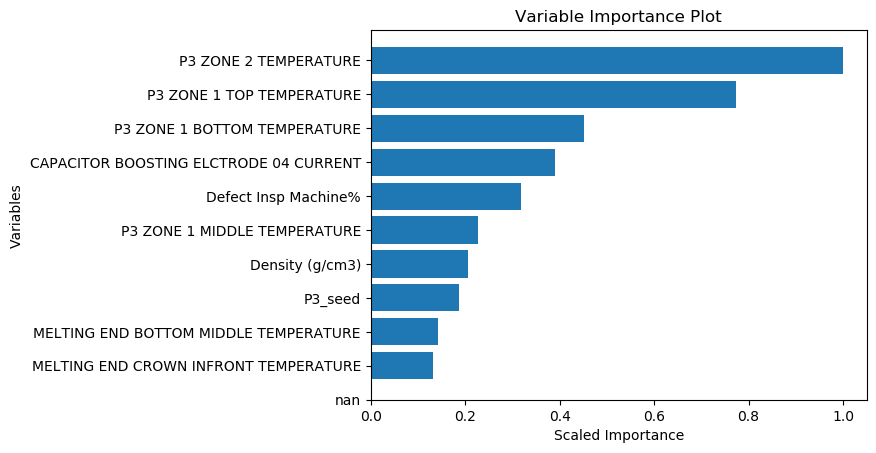

In [108]:
plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
people =list(df["Variable "])
y_pos = np.arange(len(people))
scaled_Importance = list(df["Value"])

ax.barh(y_pos, scaled_Importance, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(people)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Scaled Importance')
ax.set_ylabel('Variables')
ax.set_title('Variable Importance Plot')

plt.show()
